In [1]:
# imports 
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.image as mpimg

%matplotlib inline

In [3]:


basis = (1/sqrt(2) * array([1, 1]), 1/sqrt(2) * array([1, -1]))
# for i in [0,1]:
#     for j in [0,1]:
        # print("{}, {} :".format(i,j))
        # print(outer(basis[i], basis[j]))
        # print()



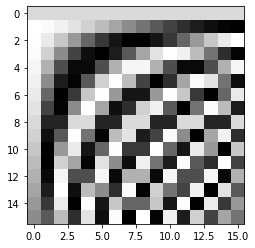

In [9]:


# The 8 x 8 DCT matrix thus looks like this.
N = 32
dct = np.zeros((N, N))
for x in range(N):
    dct[0,x] = sqrt(2.0/N) / sqrt(2.0)
for u in range(1,N):
    for x in range(N):
        dct[u,x] = sqrt(2.0/N) * cos((pi/N) * u * (x + 0.5) )
        
np.set_printoptions(precision=3)
# dct
imshow(dct, cmap='gray')
show()



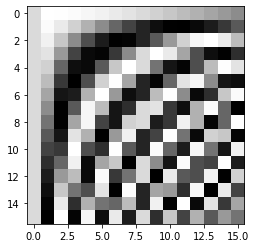

In [10]:


dct_transpose = dct.transpose()

imshow(dct_transpose, cmap='gray')
show()



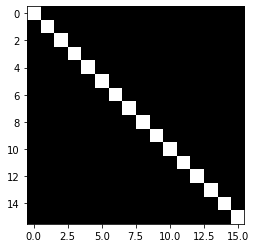

In [12]:
maybe_identity = dot(dct, dct_transpose)
roundoff = vectorize(lambda m: round(m, 6))

imshow(roundoff(maybe_identity), cmap='gray')
show()


In [6]:


def rowdot(i,j):
    return dot(dct[i, :], dct[j, :])
rowdot(0,0), rowdot(3,3), rowdot(0,3), rowdot(1, 7), rowdot(1,5)



(0.9999999999999999,
 1.0,
 5.551115123125783e-17,
 1.8735013540549517e-16,
 -2.498001805406602e-16)

In [13]:
import cv2
def doDCT(grid):
    return dot(dot(dct, grid), dct_transpose)

def undoDCT(grid):
    return dot(dot(dct_transpose, grid), dct)

image_path = "/Users/marynavek/Projects/ImageProcessing/synthetic_im_3.jpg"
    
    # image = Image.open(image_path).convert("L")
    # img = Image.open(image_path).convert("L")
tiny = cv2.imread(image_path, 0)
tiny = cv2.resize(tiny, (32,32))

# test : do DCT, then undo DCT; should get back the same image.
tiny_do_undo = undoDCT(doDCT(tiny))

imshow(tiny_do_undo)

ValueError: shapes (16,16) and (256,256) not aligned: 16 (dim 1) != 256 (dim 0)